In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#create OR datase
X_OR = np.array([[0,0], [0,1], [1,0], [1,1]])
y_OR = np.array([0,1,1,1])

X_AND = np.array([[0,0], [0,1], [1,0], [1,1]])
y_AND = np.array([0,0,0,1])

X_XOR = np.array([[0,0], [0,1], [1,0], [1,1]])
y_XOR = np.array([0,1,1,0])


In [34]:
def plot_hyperplane(weights_and_bias, X, y, title=""):
    bias = weights_and_bias[-1]
    #the equation of the hyperlane is given by 
    #w1x1 + w2x2 + ...wnxn + bias = 0
    #for 2 dimesnional data 
    #x2 = -(w1x1 + bias) / w2
    x_1_min = np.min(X[:, 0])
    x_1_max = np.max(X[:, 1])

    x_2_min = -(weights_and_bias[0]*x_1_min + bias) / weights_and_bias[1]
    x_2_max = -(weights_and_bias[0]*x_1_max + bias) / weights_and_bias[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.plot([x_1_min, x_1_max], [x_2_min, x_2_max], c="red")
    plt.grid(True)
    plt.title(title)

In [24]:
class Perceptron:
    def __init__(self, learning_rate=0.1 , n_iters=20):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.step = lambda z: [1 if step > 0 else 0 for step in z]
    
    def train(self, X, y):
        #initialize the weignht matrix with some random values 
        self.weights = np.random.randn(X.shape[1] + 1) / np.sqrt(X.shape[1])
        
        #add column of 1's to take care of the biases
        X = np.c_[X, np.ones(X.shape[0])]

        for _ in range(self.n_iters):
            linear_reg = np.dot(X, self.weights.T)
            pred = self.step(linear_reg)
            
            error = pred - y

            self.weights -= self.lr * (X.T.dot(error.T))
            

    def predict(self, X):
        #make sure that X is 2d
        X = np.atleast_2d(X)
        X = np.c_[X, np.ones(X.shape[0])]

        linear_reg = np.dot(X, self.weights.T)
        return self.step(linear_reg)
        


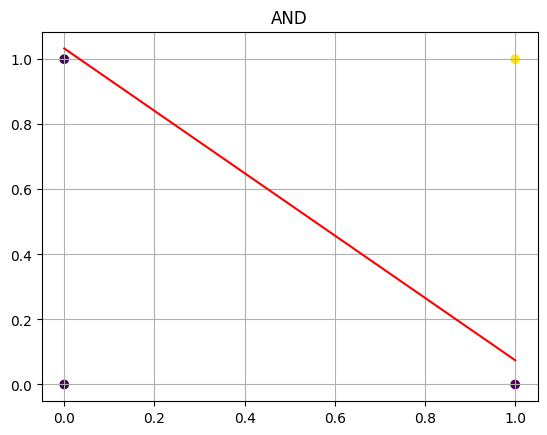

In [37]:
p = Perceptron(n_iters=50)
p.train(X_AND, y_AND)
plot_hyperplane(p.weights, X_AND, y_AND, "AND")
